In [1]:
from coral_imports import *
from coral_plotting import *
from coral_run_project import *
import matplotlib.ticker as tck

# Read in Pipeline and Libraries

In [2]:
base = os.path.join(os.getcwd(), "analysis", "configs", "base.yaml")
base_float = os.path.join(os.getcwd(), "analysis", "configs", "base_float.yaml")
library = os.path.join(os.getcwd(), "analysis", "library")
weather_fp = os.path.join(os.getcwd(), "analysis", "library", "weather", "vineyard_wind_repr_with_whales.csv")

weather = pd.read_csv(weather_fp, parse_dates=["datetime"])\
            .set_index("datetime")

# Create DFs based on CORAL runs

In [3]:
# set up yaml reading
def tuple_constructor(loader, node):
    # Load the sequence of values from the YAML node
    values = loader.construct_sequence(node)
    # Return a tuple constructed from the sequence
    return tuple(values)

# Register the constructor with PyYAML
yaml.SafeLoader.add_constructor('tag:yaml.org,2002:python/tuple', 
tuple_constructor)

In [5]:
scenarios = ['primary','low','high']

# print(scenarios)

dfs = []
managers = []
all_alloc = []
all_future = []
cols = ['best_path_forward_south_ne', 'high_deployment_south_ne', 'low_deployment_south_ne', 'best_path_forward_north_ne', 'high_deployment_north_ne', 'low_deployment_north_ne']

yrs = np.arange(2023,2043,1)
installed_cap = pd.DataFrame(columns=cols, data = np.zeros((len(yrs), len(cols))), index = yrs)

for s in scenarios:
    with open('analysis/scenarios/%s.yaml' % s) as f:
        scenario = yaml.load(f.read(), Loader=yaml.SafeLoader)
    # print(scenario)
    p = os.path.join(os.getcwd(), "analysis", "pipelines", "%s.csv" % scenario['pipeline'])
    pipeline = Pipeline(p, base, base_float, enforce_feeders=True)

    description = scenario['description']
    allocations = scenario['allocations']
    future_resources = scenario['future_resources']

    manager, df = run_manager(pipeline, allocations, library, future_resources=future_resources)
    managers.append(manager)
    dfs.append(df)
    all_alloc.append(allocations)
    all_future.append(future_resources)

    # for region in ['south_ne', 'north_ne']:
    #     df_port = df.drop(columns=['index'])
    #     if region == 'south_ne':
    #         ports = ['new_bedford','new_london']
    #     else:
    #         ports = ['salem','searsport']
        
    #     df_region = df_port[df_port['port'].isin(ports)].reset_index(drop=True).reset_index()
    #     # display(df_region)
    #     df_region['finished'] = df_region['Date Finished'].dt.year
    #     df_finished = df_region.groupby(['finished']).capacity.sum().reset_index()
    #     # display(df_finished)
    #     mapping = dict(df_finished[['finished','capacity']].values)
    #     installed_cap['%s_%s' % (s,region)] = installed_cap.index.map(mapping)
# display(installed_cap)
# installed_cap.to_csv('analysis/results/installed_cap_%s.csv' % region)
display(dfs)


ORBIT library intialized at 'c:\Users\sbredenk\Repos\ORBIT_natl_gaps\library'
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation:
TurbineInstallation

[    index                                       name  Initialized  \
 0       0     Hypothetical Gulf of Maine Draft WEA 3       157800   
 1       1     Hypothetical Gulf of Maine Draft WEA 4       157800   
 2       2     Hypothetical Gulf of Maine Draft WEA 2       157800   
 3       3  Hypothetical Central Atlantic Draft WEA 6       149016   
 4       4           Hypothetical NY Bight Floating 1       149016   
 ..    ...                                        ...          ...   
 66     66      Atlantic Shores Offshore Wind South 1        26304   
 67     67                                     MarWin        26304   
 68     68                          Revolution Wind 1         8760   
 69     69                            Vineyard Wind 1            0   
 70     70                                 South Fork            0   
 
           Started       Finished  FoundationFinished Date Initialized  \
 0   166601.154828  182798.118101       182798.118101       2041-01-01   
 1   16604

# Deployment Pipelines

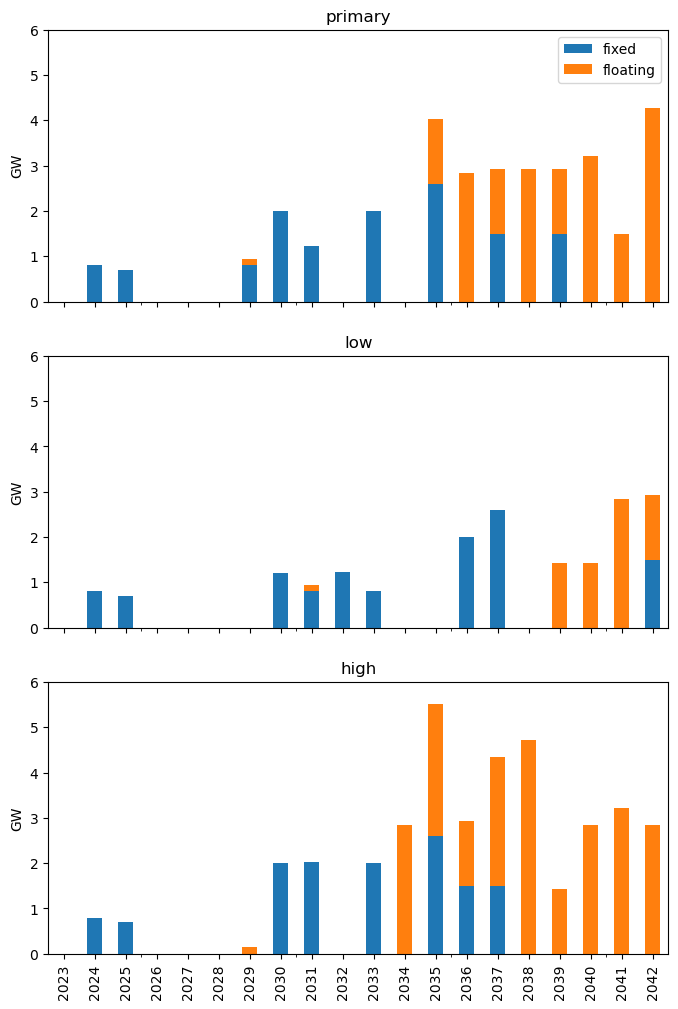

In [6]:
def fix_float(row):
    if row['substructure'] == 'semisub':
        return('float')
    else:
        return('fix')

yrs = np.arange(2023,2043)
cap = pd.Series(np.zeros(len(yrs)), yrs)
# fig = plt.figure(figsize=(15, 4), dpi=200)
fig, axes = plt.subplots(3,1, sharex=True, figsize=(8, 12))
i=0
region = ['MA','ME','CT','RI','NH','RI/CT']
for df in dfs:
    df = df.drop(columns=['index'])
    df = df[df['location'].isin(region)].reset_index(drop=True).reset_index()
    df['cod'] = df['estimated_cod'].dt.year
    df['fix/float'] = df.apply(fix_float, axis=1)
    cap = df.groupby(['fix/float','cod']).sum('capacity')['capacity'] / 1000
    cap = cap.unstack().transpose().reindex(yrs)
    # cap = cap.reindex(yrs)
    cap.plot.bar(ax=axes[i], stacked=True)
    axes[i].set_title(scenarios[i])
    axes[i].set_xlabel('')
    axes[i].set_ylabel('GW')
    axes[i].set_ylim(0,6)
    axes[i].get_legend().remove()
    i += 1
    
axes[0].legend(['fixed','floating'])
plt.show()
fig.savefig('deployment',bbox_inches='tight')

fix/float  cod 
Existing   2024     800
           2025     704
           2029     944
           2030    2004
           2031    1232
           2033    2000
           2035    2600
GoME       2035    1424
           2036    2848
           2037    1424
           2038    1424
           2039    1424
           2040    1424
           2042    4272
fix        2037    1500
           2039    1500
float      2038    1500
           2040    1800
           2041    1500
Name: capacity, dtype: int64

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.DeprecationWarning: c:\Users\sbredenk\.conda\envs\orbit-sophie\lib\site-packages\ipykernel_launcher.py:26
The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.DeprecationWarning: c:\Users\sbredenk\.conda\envs\orbit-sophie\lib\site-packages\ipykernel_launcher.py:29
The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.DeprecationWarning: c:\Users\sbredenk\.conda\envs\orbit-sophie\lib\site-packages\ipykernel_launcher.py:30
The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.DeprecationWarning: c:\Users\sbredenk\.conda\envs\orbit-sophie\lib\site-packages\ipykernel_launcher.py

fix/float  cod 
Existing   2024     800.00
           2025     704.00
           2030    1204.00
           2031     944.00
           2032    1232.00
           2033     800.00
           2036    2000.00
           2037    2600.00
GoME       2039    1424.12
           2040    1424.12
           2041    2848.24
           2042    1424.12
fix        2042    1500.00
Name: capacity, dtype: float64

fix/float  cod 
Existing   2024     800
           2025     704
           2029     144
           2030    2004
           2031    2032
           2033    2000
           2035    2600
GoME       2034    2848
           2035    1424
           2036    1424
           2037    2848
           2038    1424
           2039    1424
           2040    2848
           2041    1424
           2042    2848
fix        2036    1500
           2037    1500
float      2035    1500
           2038    3300
           2041    1800
Name: capacity, dtype: int64

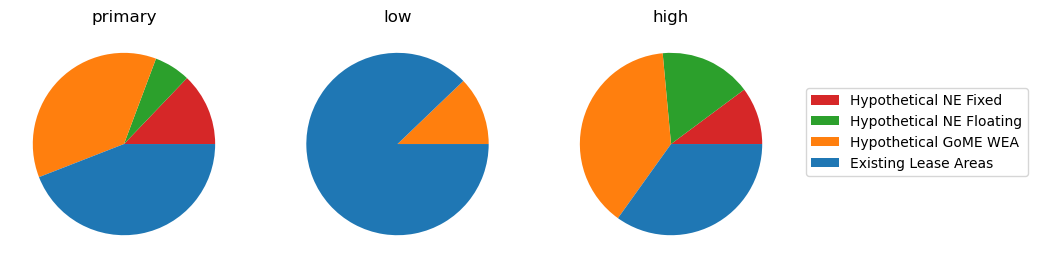

In [20]:
fig, axes = plt.subplots(1,3, figsize=(10,6))
scenarionames = ['primary','low','high']
i=0
def fix_float(row):
    if 'Gulf of Maine Draft WEA' in row['name']:
        return 'GoME'
    elif 'Hypothetical' in row['name']:
        if row['substructure'] == 'semisub':
            return('float')
        else:
            return('fix')
    else:
        return 'Existing'
    
colors = ['tab:red', 'tab:green', 'tab:orange', 'tab:blue']

for df in dfs:
    df = df.drop(columns=['index'])
    df = df[df['location'].isin(region)].reset_index(drop=True).reset_index()
    df['cod'] = df['estimated_cod'].dt.year
    df['fix/float'] = df.apply(fix_float, axis=1)
    cap = df.groupby(['fix/float','cod']).sum('capacity')['capacity']
    display(cap)

    float_2030 = cap.get('float', pd.Series())
    fix_2030 = cap.get('fix', pd.Series())
    float_sum_2030 = float_2030.loc[float_2030.index < 2030].sum()
    fix_sum_2030 = fix_2030.loc[fix_2030.index < 2030].sum()
    GoME_2030 = cap.get('GoME', pd.Series())
    Existing_2030 = cap.get('Existing', pd.Series())
    GoME_sum_2030 = GoME_2030.loc[GoME_2030.index < 2030].sum()
    Existing_sum_2030 = Existing_2030.loc[Existing_2030.index < 2030].sum()

    #axes[0,i].pie([fix_sum_2030, float_sum_2030, GoME_sum_2030, Existing_sum_2030], labels=['','','',''])
    #axes[0,i].set_title(scenarionames[i])
    

    float_2040 = cap.get('float', pd.Series())
    fix_2040 = cap.get('fix', pd.Series())
    float_sum_2040 = float_2040.loc[float_2040.index < 2040].sum()
    fix_sum_2040 = fix_2040.loc[fix_2040.index < 2040].sum()
    GoME_2040 = cap.get('GoME', pd.Series())
    Existing_2040 = cap.get('Existing', pd.Series())
    GoME_sum_2040 = GoME_2040.loc[GoME_2040.index < 2040].sum()
    Existing_sum_2040 = Existing_2040.loc[Existing_2040.index < 2040].sum()

    #axes[1,i].pie([fix_sum_2040, float_sum_2040, GoME_sum_2040, Existing_sum_2040], labels=['','','',''], autopct='%1.1f%%')
    axes[i].pie([fix_sum_2040, float_sum_2040, GoME_sum_2040, Existing_sum_2040], labels=['','','',''], colors=colors)
    axes[i].set_title(scenarionames[i])

    i += 1

#axes[0,0].set_ylabel('2030', rotation=0)
#axes[0,0].set_ylabel('2040', rotation=0)

fig.legend(['Hypothetical NE Fixed', 'Hypothetical NE Floating', 'Hypothetical GoME WEA', 'Existing Lease Areas'], bbox_to_anchor=[1.15,0.6])
#fig.sup_title('Deploment')
plt.show()



# NE summary plots

In [53]:
invest = us_invest

In [54]:
print(invest)

ne_infv         309.0
ne_infv_infp    309.0
ne_high_infv    300.0
Name: 2042, dtype: float64


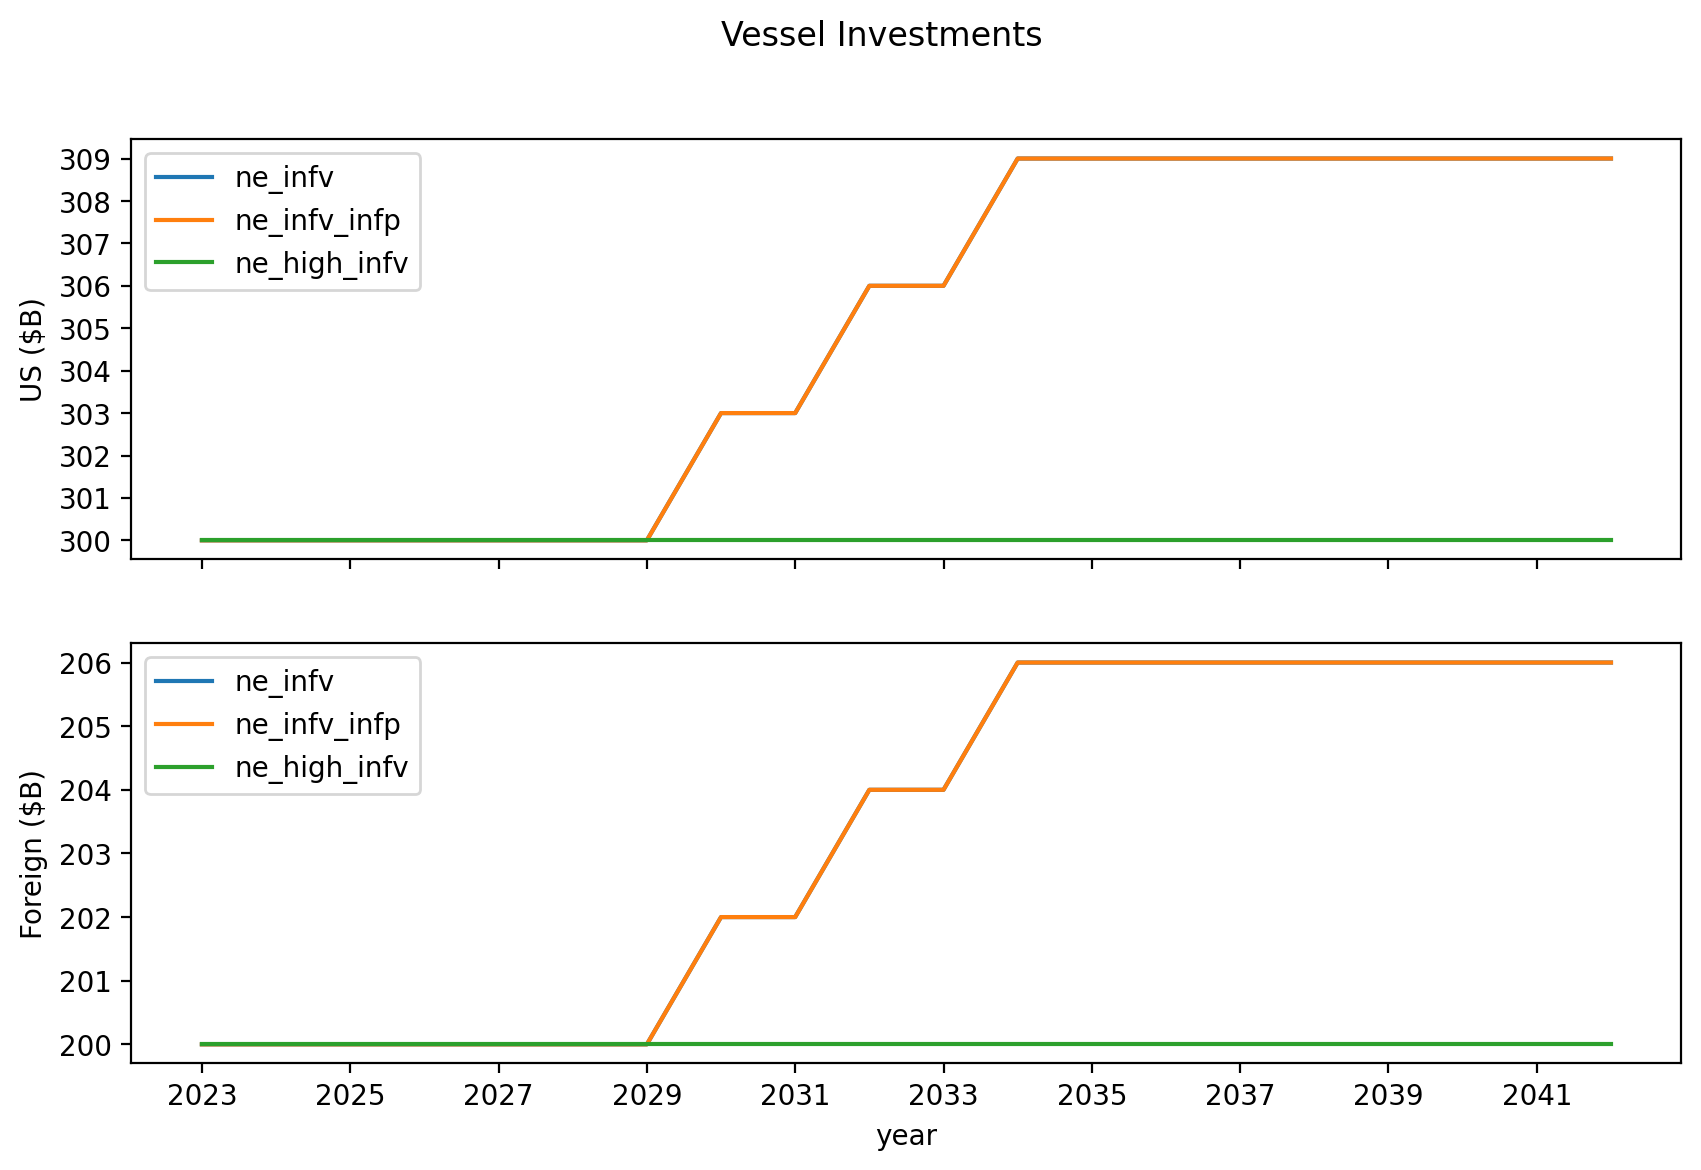

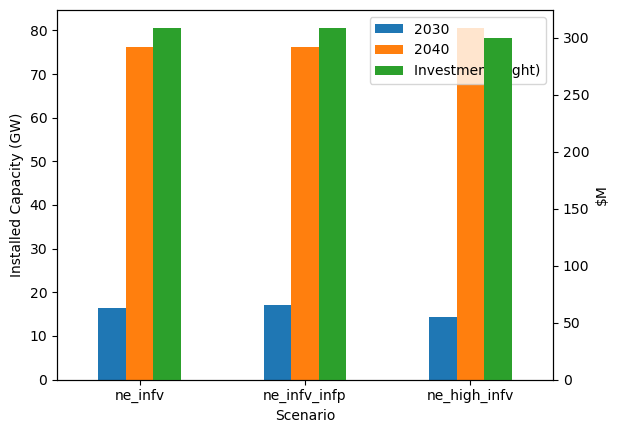

In [55]:
df = dfs[0]
df_cap = pd.DataFrame(columns = ['Scenario','2030','2040','Investment'])
i=0
for df in dfs:
    cap_by_year = pd.DataFrame()
    cap_by_year['year'] = pd.DatetimeIndex(df['Date Finished']).year
    cap_by_year['capacity'] = df['capacity']
    cap = cap_by_year.groupby(['year'])['capacity'].sum().reset_index()
    cap_2030 = cap.loc[cap['year'] <= 2030]['capacity'].sum()/1e3
    cap_2040 = cap.loc[cap['year'] <= 2040]['capacity'].sum()/1e3
    row = {'Scenario': scenarios[i], '2030': cap_2030, '2040': cap_2040, 'Investment': invest.iloc[i]}
    df_cap = df_cap.append(row, ignore_index=True)
    i+=1

# fig = plt.figure(figsize=(10,4), dpi=200)
# ax = fig.add_subplot(111)

ax = df_cap.plot.bar(x='Scenario',secondary_y=['Investment'], rot=0)
# df_cap['Investment'].plot(kind='bar', secondary_y=True)
ax.set_ylabel('Installed Capacity (GW)')
ax.right_ax.set_ylabel("$M")
plt.xlabel('')
plt.show()


In [21]:
df_cap

,Scenario,Capacity Installed By 2030,Capacity Installed By 2040
0,ne_infv,16373,76277
1,ne_infv_infp,17173,76277
2,ne_high_infv,14259,80629


In [ ]:
# cap = cap_by_year.groupby(['year'])['capacity'].sum().reset_index()
# cap_2030 = cap.loc[cap['year'] <= 2030]
# cap_2030

,year,capacity
0,2023,932
1,2024,704
2,2026,1758
3,2027,4212
4,2028,1068
5,2029,2439
6,2030,5260


In [ ]:
# sum_2030 = cap_2030['capacity'].sum()
# sum_2030

16373

# Plot Vessel Utilization

In [ ]:
yrs = np.arange(2023,2061)
df_util = pd.DataFrame(columns = ['wtiv', 'us_wtiv', 'ffiv', 'ahts'], index=yrs)
df_util = df_util.fillna(0)
# display(df_util)
df = dfs[0]

for _,project in df.iterrows():
    # FOUNDATIONS
    if project['substructure'] in ('monopile','jacket'):
        if project['Date FoundationFinished'].year == project['Date Started'].year:
            util = (project['Date FoundationFinished'].date() - project['Date Started'].date()).days * 24
            df_util.loc[project['Date FoundationFinished'].year,'ffiv'] += util
        else:
            total = project['Date FoundationFinished'].date() - project['Date Started'].date()
            for year in np.arange(project['Date Started'].year,project['Date FoundationFinished'].year + 1):
                if year == project['Date Started'].year:
                    util = (dt.date(year + 1, 1, 1) - project["Date Started"].date()).days * 24
                elif year == project['Date FoundationFinished'].year:
                    util = (project['Date FoundationFinished'].date() - dt.date(year,1,1)).days * 24
                else:
                    util = (dt.date(year + 1, 1, 1) - dt.date(year, 1, 1)).days * 24
                df_util.loc[year,'ffiv'] += util

    # TURBINES
    if project['substructure'] in ('monopile','jacket'):
        if project['Date Finished'].year == project['Date FoundationFinished'].year:
            util = (project['Date Finished'].date() - project['Date FoundationFinished'].date()).days * 24
            if project['us_wtiv']:
                df_util.loc[project['Date Finished'].year,'us_wtiv'] += util
            else:
                df_util.loc[project['Date Finished'].year,'wtiv'] += util
        else:
            total = project['Date Finished'].date() - project['Date FoundationFinished'].date()
            for year in np.arange(project['Date FoundationFinished'].year,project['Date Finished'].year + 1):
                if year == project['Date FoundationFinished'].year:
                    util = (dt.date(year + 1, 1, 1) - project["Date FoundationFinished"].date()).days * 24
                elif year == project['Date Finished'].year:
                    util = (project['Date Finished'].date() - dt.date(year,1,1)).days * 24
                else:
                    util = (dt.date(year + 1, 1, 1) - dt.date(year, 1, 1)).days * 24

                if project['us_wtiv']:
                    df_util.loc[year,'us_wtiv'] += util
                else:
                    df_util.loc[year,'wtiv'] += util
    else:
        if project['Date Finished'].year == project['Date Started'].year:
            util = (project['Date Finished'].date() - project['Date Started'].date()).days * 24
            df_util.loc[project['Date Finished'].year,'ffiv'] += util
        else:
            total = project['Date Finished'].date() - project['Date Started'].date()
            for year in np.arange(project['Date Started'].year,project['Date Finished'].year + 1):
                if year == project['Date Started'].year:
                    util = (dt.date(year + 1, 1, 1) - project["Date Started"].date()).days * 24
                elif year == project['Date Finished'].year:
                    util = (project['Date Finished'].date() - dt.date(year,1,1)).days * 24
                else:
                    util = (dt.date(year + 1, 1, 1) - dt.date(year, 1, 1)).days * 24
                df_util.loc[year,'ahts'] += util
    
# display(df_util)

In [ ]:
def vessel_hours(df):
    yrs = np.arange(2023,2061)
    df_util = pd.DataFrame(columns = ['example_wtiv', 'example_wtiv_us', 'example_heavy_lift_vessel', 'example_ahts_vessel'], index=yrs)
    df_util = df_util.fillna(0)

    for _,project in df.iterrows():
        # FOUNDATIONS
        if project['substructure'] in ('monopile','jacket'):
            if project['Date FoundationFinished'].year == project['Date Started'].year:
                util = (project['Date FoundationFinished'].date() - project['Date Started'].date()).days * 24
                df_util.loc[project['Date FoundationFinished'].year,'example_heavy_lift_vessel'] += util
            else:
                total = project['Date FoundationFinished'].date() - project['Date Started'].date()
                for year in np.arange(project['Date Started'].year,project['Date FoundationFinished'].year + 1):
                    if year == project['Date Started'].year:
                        util = (dt.date(year + 1, 1, 1) - project["Date Started"].date()).days * 24
                    elif year == project['Date FoundationFinished'].year:
                        util = (project['Date FoundationFinished'].date() - dt.date(year,1,1)).days * 24
                    else:
                        util = (dt.date(year + 1, 1, 1) - dt.date(year, 1, 1)).days * 24
                    df_util.loc[year,'example_heavy_lift_vessel'] += util

        # TURBINES
        if project['substructure'] in ('monopile','jacket'):
            if project['Date Finished'].year == project['Date FoundationFinished'].year:
                util = (project['Date Finished'].date() - project['Date FoundationFinished'].date()).days * 24
                if project['us_wtiv']:
                    df_util.loc[project['Date Finished'].year,'example_wtiv_us'] += util
                else:
                    df_util.loc[project['Date Finished'].year,'example_wtiv'] += util
            else:
                total = project['Date Finished'].date() - project['Date FoundationFinished'].date()
                for year in np.arange(project['Date FoundationFinished'].year,project['Date Finished'].year + 1):
                    if year == project['Date FoundationFinished'].year:
                        util = (dt.date(year + 1, 1, 1) - project["Date FoundationFinished"].date()).days * 24
                    elif year == project['Date Finished'].year:
                        util = (project['Date Finished'].date() - dt.date(year,1,1)).days * 24
                    else:
                        util = (dt.date(year + 1, 1, 1) - dt.date(year, 1, 1)).days * 24

                    if project['us_wtiv']:
                        df_util.loc[year,'example_wtiv_us'] += util
                    else:
                        df_util.loc[year,'example_wtiv'] += util
        else:
            if project['Date Finished'].year == project['Date Started'].year:
                util = (project['Date Finished'].date() - project['Date Started'].date()).days * 24
                df_util.loc[project['Date Finished'].year,'example_ahts_vessel'] += util
            else:
                total = project['Date Finished'].date() - project['Date Started'].date()
                for year in np.arange(project['Date Started'].year,project['Date Finished'].year + 1):
                    if year == project['Date Started'].year:
                        util = (dt.date(year + 1, 1, 1) - project["Date Started"].date()).days * 24
                    elif year == project['Date Finished'].year:
                        util = (project['Date Finished'].date() - dt.date(year,1,1)).days * 24
                    else:
                        util = (dt.date(year + 1, 1, 1) - dt.date(year, 1, 1)).days * 24
                    df_util.loc[year,'example_ahts_vessel'] += util
        
    return(df_util)

In [ ]:
# vessel_hours(dfs[0])

In [ ]:
def vessel_pipeline(allocs, futures):
    yrs = np.arange(2023,2061)
    # dates = pd.to_datetime(yrs, format='%Y')
    fig = plt.figure(figsize=(10,4), dpi=200)
    ax = fig.add_subplot(111)
    vessel_types = ['example_wtiv','example_heavy_lift_vessel', 'example_wtiv_us', 'example_ahts_vessel']
    init_alloc = [allocs['wtiv'][1][1], allocs['wtiv'][0][1], allocs['wtiv'][2][1], allocs['ahts_vessel'][1]]
    vessel_count = pd.DataFrame(columns=vessel_types, data = np.ones((len(yrs), len(vessel_types))), index = yrs)
    vessel_count = vessel_count.mul(init_alloc)
    # vessel_count.iloc[0] = init_alloc

    for vessel in vessel_types:
        for vessel_type in futures:
            if vessel_type[1] == vessel:
                years = [x.year for x in vessel_type[2]]
                for year in years:
                    vessel_count.loc[year:,vessel] += 1
    
    # vessel_count.loc[:,'total'] = vessel_count.sum(axis=1)
    # vessel_count['total'] = vessel_count['total'].cumsum()

    return(vessel_count)

In [ ]:
allocs = all_alloc[0]
futures = all_future[0]
vessel_pipeline(allocs,futures)

,example_wtiv,example_heavy_lift_vessel,example_wtiv_us,example_ahts_vessel
2023,2.0,3.0,1.0,2.0
2024,2.0,3.0,1.0,2.0
2025,2.0,3.0,1.0,2.0
2026,2.0,3.0,1.0,2.0
2027,2.0,3.0,1.0,2.0
2028,2.0,3.0,1.0,2.0
2029,2.0,3.0,1.0,2.0
2030,2.0,4.0,2.0,2.0
2031,2.0,4.0,2.0,2.0
2032,2.0,4.0,2.0,2.0


In [ ]:
df_vessel_util = vessel_hours(dfs[0])
df_vessel_count = vessel_pipeline(allocs,futures)
df_perc_util = df_vessel_util / df_vessel_count / 8766 * 100

In [ ]:
# fig = plt.figure(figsize=(10,5), dpi=200)
# ax = fig.add_subplot(111)
# df_perc_util.plot(kind='bar', ax=ax)
# ax.set_xlabel("")
# ax.set_ylabel("Vessel Utilization (%)")
# plt.show()

def read_yaml(scenario, path):
        # set up yaml reading
    def tuple_constructor(loader, node):
        # Load the sequence of values from the YAML node
        values = loader.construct_sequence(node)
        # Return a tuple constructed from the sequence
        return tuple(values)
    # Register the constructor with PyYAML
    yaml.SafeLoader.add_constructor('tag:yaml.org,2002:python/tuple', tuple_constructor)
 
    yaml_path = '%s/%s.yaml' % (path, scenario)
    with open(yaml_path) as f:
        scenario = yaml.load(f.read(), Loader=yaml.SafeLoader)
    return(scenario)

In [ ]:
vessel_types = ['example_wtiv','example_heavy_lift_vessel', 'example_wtiv_us', 'example_ahts_vessel']
vessel_rates = []
for vessel in vessel_types:
    rate_path = 'analysis/library/vessels'
    vessel_yaml = read_yaml(vessel, rate_path)
    vessel_rate = vessel_yaml['vessel_specs']['day_rate'] / 24
    vessel_rates.append(vessel_rate)
print(vessel_rates)

[7500.0, 20833.333333333332, 7500.0, 4166.666666666667]


# Plot Installed Capacity

In [ ]:
def installed_cap(dfs, desc):

    cum_desc = []
    i = 0
    for d in desc:
        cum_desc.append("%s cumulative" % d)
        i += 1
    yrs = np.arange(2023,2043,1)
    df_cap = pd.DataFrame(columns=desc, data = np.zeros((len(yrs), len(desc))), index = yrs)
    df_cum = pd.DataFrame(columns=cum_desc, data = np.zeros((len(yrs), len(desc))), index = yrs)

    dfs[0]['cod'] = dfs[0]['estimated_cod'].dt.year
    df_cod = dfs[0].groupby(['cod']).capacity.sum().reset_index()
    df_cod['sum'] = df_cod['capacity'].cumsum(axis=0) / 1000

    fig = plt.figure(figsize=(8, 10), dpi=200)
    ax = fig.add_subplot(1,1,1)

    # df_cod.plot(kind='line', x='cod', y='sum', color='k', ax=ax, label='Unconstrained Resources')
    i=0
    width = 0.25

    for df in dfs:
        df['finished'] = df['Date Finished'].dt.year
        df_finished = df.groupby(['finished']).capacity.sum().reset_index()
        df_finished['capacity'] = df_finished['capacity'] / 1000
        df_finished['sum'] = df_finished['capacity'].cumsum(axis=0)

        cap_mapping = dict(df_finished[['finished', 'capacity']].values)
        df_cap[desc[i]] = df_cap.index.map(cap_mapping).fillna(0)

        df_cum[cum_desc[i]] = df_cap[desc[i]].cumsum(axis=0)
        i += 1

    df = pd.concat([df_cap, df_cum], axis=1)
    # df['year'] = yrs
    # display(df)
    df[cum_desc].plot(linestyle = '-', ax=ax, use_index=False)
    df[desc].plot(kind='bar', ax=ax)
    # df_cap.plot.bar(rot=0)
    
    ax.set_xlabel("")
    ax.set_ylabel("Capacity (GW)")
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.legend()

In [ ]:
installed_cap(dfs, scenarios)

In [ ]:
# sample
df = pd.DataFrame({
    'month': ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], 
    '2013_val': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 9, 6], 
    '2014_val': [4.0, 5.0, *[float('nan')]*10], 
    '2014_target_val': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]})

# month data to datetime
df['month'] = pd.to_datetime(df['month'], format='%b')

fig, ax = plt.subplots(1, facecolor='white')
df.plot(y='2014_target_val', linestyle='-', marker='o', ax=ax)
df.plot(x='month', y=['2013_val', '2014_val'], kind='bar', ax=ax)


<AxesSubplot:xlabel='month'>

# Investment Plots

In [ ]:
low_vessel_costs = {
    "example_wtiv": 550,
    "example_heavy_lift_vessel": 500,
    "example_heavy_feeder": 250,
    "example_ahts_vessel": 75
}

avg_vessel_costs = {
    "example_wtiv": 615,
    "example_heavy_lift_vessel": 625,
    "example_heavy_feeder_1kit": 250,
    "example_feeder": 250,
    "example_ahts_vessel": 80
}

high_vessel_costs = {
    "wtiv": 680,
    "hlv": 750,
    "feeder": 300,
    "ahts_vessel": 85
}

In [ ]:
alloc = all_alloc[0]
print(alloc)
# display(alloc)
vessel_types = ['example_wtiv','example_heavy_lift_vessel','example_feeder', 'example_heavy_feeder_1kit','example_ahts_vessel']
init_alloc = [alloc['wtiv'][1][1], alloc['wtiv'][0][1], alloc['feeder'][1][1], alloc['feeder'][0][1], alloc['ahts_vessel'][1]]

yrs = np.arange(2023,2043)
# dates = pd.to_datetime(yrs, format='%Y')
vessel_investment = pd.DataFrame(columns=vessel_types, data = np.zeros((len(yrs), len(vessel_types))), index = dates)
vessel_investment.iloc[0] = init_alloc
display(vessel_investment)

{'ahts_vessel': ('example_ahts_vessel', 2), 'feeder': [('example_heavy_feeder_1kit', 6), ('example_feeder', 4)], 'towing_vessel': ('example_towing_vessel', 100), 'wtiv': [('example_heavy_lift_vessel', 3), ('example_wtiv', 2), ('example_wtiv_us', 1)], 'port': [('new_london_1', 1), ('new_london_2', 0), ('new_bedford', 1), ('sbmt', 0), ('njwp_1', 0), ('njwp_2', 0), ('searsport_1', 0), ('searsport_2', 0), ('tradepoint_1', 0), ('tradepoint_2', 0), ('portsmouth_1', 0), ('portsmouth_2', 0), ('salem', 0), ('arthur_kill', 0)]}


NameError: name 'dates' is not defined

In [ ]:
display(all_future)

: 

In [ ]:
for vessel in vessel_types:
    for vessel_type in all_future[0]:
        if vessel_type[1] == vessel:
            years = vessel_type[2]
            print(years)
            print(len(years))
            vessel_investment.loc[years,vessel] += len(years)
    # vessel_investment[vessel] = vessel_investment[vessel] * avg_vessel_costs[vessel]

In [ ]:
display(vessel_investment)

,example_wtiv,example_heavy_lift_vessel,example_feeder,example_heavy_feeder_1kit,example_ahts_vessel
2023-01-01,2.0,3.0,4.0,6.0,2.0
2024-01-01,0.0,0.0,0.0,0.0,0.0
2025-01-01,0.0,0.0,0.0,0.0,0.0
2026-01-01,0.0,0.0,0.0,0.0,0.0
2027-01-01,0.0,0.0,0.0,0.0,0.0
2028-01-01,0.0,0.0,0.0,0.0,0.0
2029-01-01,0.0,0.0,0.0,0.0,0.0
2030-01-01,0.0,0.0,0.0,0.0,0.0
2031-01-01,0.0,0.0,0.0,0.0,0.0
2032-01-01,0.0,0.0,0.0,0.0,0.0


In [ ]:
us_vessels = ['example_feeder', 'example_heavy_feeder_1kit', 'example_ahts_vessel']
foreign_vessels = ['example_wtiv', 'example_heavy_lift_vessel']
vessel_investment.loc[:,'us_total'] = vessel_investment[us_vessels].sum(axis=1)
vessel_investment['us_total'] = vessel_investment['us_total'].cumsum()
vessel_investment.loc[:,'foreign_total'] = vessel_investment[foreign_vessels].sum(axis=1)
vessel_investment['foreign_total'] = vessel_investment['foreign_total'].cumsum()
display(vessel_investment)

: 

In [ ]:
vessel_investment['total'].plot()

: 

## Invesment from func

In [37]:
vessel_types = ['example_wtiv','example_heavy_lift_vessel', 'example_feeder', 'example_heavy_feeder_1kit', 'example_ahts_vessel']
vessel_costs = {
    "example_wtiv": 615,
    "example_heavy_lift_vessel": 625,
    "example_heavy_feeder_1kit": 250,
    "example_feeder": 100,
    "example_ahts_vessel": 80
}
# display(all_future)
display(all_alloc)

[{'ahts_vessel': ('example_ahts_vessel', 100),
  'feeder': [('example_heavy_feeder_1kit', 100), ('example_feeder', 100)],
  'towing_vessel': ('example_towing_vessel', 100),
  'wtiv': [('example_heavy_lift_vessel', 100), ('example_wtiv', 100)],
  'port': [('new_london_1', 1),
   ('new_london_2', 0),
   ('new_bedford', 1),
   ('sbmt', 0),
   ('njwp_1', 0),
   ('njwp_2', 0),
   ('searsport_1', 0),
   ('searsport_2', 0),
   ('tradepoint_1', 0),
   ('tradepoint_2', 0),
   ('portsmouth_1', 0),
   ('portsmouth_2', 0),
   ('salem', 0),
   ('arthur_kill', 0)]},
 {'ahts_vessel': ('example_ahts_vessel', 100),
  'feeder': [('example_heavy_feeder_1kit', 100), ('example_feeder', 100)],
  'towing_vessel': ('example_towing_vessel', 100),
  'wtiv': [('example_heavy_lift_vessel', 100), ('example_wtiv', 100)],
  'port': [('new_london_1', 100),
   ('new_london_2', 100),
   ('new_bedford', 100),
   ('sbmt', 100),
   ('njwp_1', 100),
   ('njwp_2', 100),
   ('searsport_1', 100),
   ('searsport_2', 100),
   (

In [ ]:
def investment_plot(allocs, futures, names, vessel_types, vessel_costs):
    yrs = np.arange(2023,2043)
    dates = pd.to_datetime(yrs, format='%Y')
    fig = plt.figure(figsize=(10,4), dpi=200)
    ax = fig.add_subplot(111)
    investments = pd.DataFrame(index=dates, columns=names, data=np.zeros((len(yrs), len(names))))
    for i in range(0,len(names)):
        init_alloc = [allocs[i]['wtiv'][1][1], allocs[i]['wtiv'][0][1], allocs[i]['ahts_vessel'][1]]
        vessel_investment = pd.DataFrame(columns=vessel_types, data = np.zeros((len(yrs), len(vessel_types))), index = dates)
        vessel_investment.iloc[0] = init_alloc

        for vessel in vessel_types:
            for vessel_type in futures[i]:
                if vessel_type[1] == vessel:
                    years = vessel_type[2]
                    vessel_investment.loc[years,vessel] += 1
            vessel_investment[vessel] = vessel_investment[vessel] * vessel_costs[vessel]
        
        vessel_investment.loc[:,'total'] = vessel_investment.sum(axis=1)
        vessel_investment['total'] = vessel_investment['total'].cumsum()

        vessel_investment['total'].plot(label=names[i])
        investments[names[i]] = vessel_investment['total']
    investments['year'] = yrs
    investments.set_index('year', inplace=True)
    display(investments)
    ax.legend()
        

In [51]:
plt.close()
def vessel_investment_plot(allocs, futures, names, vessel_types, vessel_costs):
    yrs = np.arange(2023,2043)
    dates = pd.to_datetime(yrs, format='%Y')
    fig, axes = plt.subplots(2,1, figsize=(10,6), dpi=200, sharex=True)

    us_investments = pd.DataFrame(index=dates, columns=names, data=np.zeros((len(yrs), len(names))))
    total_investments = pd.DataFrame(index=dates, columns=names, data=np.zeros((len(yrs), len(names))))
    foreign_investments = pd.DataFrame(index=dates, columns=names, data=np.zeros((len(yrs), len(names))))
    for i in range(0,len(names)):
        init_alloc = [allocs[i]['wtiv'][1][1], allocs[i]['wtiv'][0][1], allocs[i]['feeder'][1][1], allocs[i]['feeder'][0][1], allocs[i]['ahts_vessel'][1]]
        vessel_investment = pd.DataFrame(columns=vessel_types, data = np.zeros((len(yrs), len(vessel_types))), index = dates)
        vessel_investment.iloc[0] = init_alloc
        # display(vessel_investment)
        for vessel in vessel_types:
            for vessel_type in futures[i]:
                if vessel_type[1] == vessel:
                    years = vessel_type[2]
                    # print(vessel_type[1])
                    # print(years)
                    for year in years:
                        vessel_investment.loc[[year],vessel] += 1
            # vessel_investment[vessel] = vessel_investment[vessel] * vessel_costs[vessel]
        
        us_vessels = ['example_feeder', 'example_heavy_feeder_1kit', 'example_ahts_vessel']
        foreign_vessels = ['example_wtiv', 'example_heavy_lift_vessel']
        vessel_investment.loc[:,'us_total'] = vessel_investment[us_vessels].sum(axis=1)
        vessel_investment['us_total'] = vessel_investment['us_total'].cumsum() # / 1000
        vessel_investment.loc[:,'foreign_total'] = vessel_investment[foreign_vessels].sum(axis=1)
        vessel_investment['foreign_total'] = vessel_investment['foreign_total'].cumsum() # /1000
        vessel_investment.loc[:,'total'] = vessel_investment[vessel_types].sum(axis=1)
        vessel_investment['total'] = vessel_investment['total'].cumsum() # / 1000

        total_investments[names[i]] = vessel_investment['total']
        us_investments[names[i]] = vessel_investment['us_total']
        foreign_investments[names[i]] = vessel_investment['foreign_total']
    us_investments['year'] = yrs
    us_investments.set_index('year', inplace=True)

    total_investments['year'] = yrs
    total_investments.set_index('year', inplace=True)

    us_investments['year'] = yrs
    us_investments.set_index('year', inplace=True)
    us_investments.plot(ax=axes[0])

    foreign_investments['year'] = yrs
    foreign_investments.set_index('year', inplace=True)
    foreign_investments.plot(ax=axes[1])

    axes[0].set_ylabel('US ($B)')
    axes[1].set_ylabel('Foreign ($B)')
    axes[0].yaxis.set_major_locator(tck.MaxNLocator(integer=True))
    plt.minorticks_off()
    # plt.tick_params(bottom = False) 
    axes[0].set_xticks(yrs[::2])
    fig.suptitle('Vessel Investments')
    return(us_investments.iloc[-1])
    # return us_investments, foreign_investments

In [52]:
us_invest = vessel_investment_plot(all_alloc, all_future, scenarios, vessel_types, vessel_costs)

# Installed Capacity CSV

In [ ]:
yrs = np.arange(2023,2043,1)
installed_cap = pd.DataFrame(columns=scenarios, data = np.zeros((len(yrs), len(scenarios))), index = yrs)
display(installed_cap)


: 

In [ ]:
for df in dfs:
        df['finished'] = df['Date Finished'].dt.year
        df_finished = df.groupby(['finished']).capacity.sum().reset_index()
        display(df_finished)

        mapping = dict(df_finished[['finished','capacity']].values)
        installed_cap['best_path_forward'] = installed_cap.index.map(mapping)
        display(installed_cap)

: 

: 

# Throughput Plot

In [ ]:
df = dfs[0]

: 

In [ ]:
res = []

for _, project in df.iterrows():

    if project["Date Finished"].year == project["Date Started"].year:
        res.append((project["Date Finished"].year, project["port"], project["capacity"]))

    else:

        total = project["Date Finished"].date() - project["Date Started"].date()
        for year in np.arange(project["Date Started"].year, project["Date Finished"].year + 1):
            if year == project["Date Started"].year:
                perc = (dt.date(year + 1, 1, 1) - project["Date Started"].date()) / total

            elif year == project["Date Finished"].year:
                perc = (project["Date Finished"].date() - dt.date(year, 1, 1)) / total

            else:
                perc = (dt.date(year + 1, 1, 1) - dt.date(year, 1, 1)) / total

            res.append((year, project["port"], perc * project["capacity"]))

throughput = pd.DataFrame(res, columns=["year", "port", "capacity"]).pivot_table(
    index=["year"],
    columns=["port"],
    aggfunc="sum",
    fill_value=0.
)["capacity"]

display(throughput)

fig = plt.figure(figsize=(6, 4), dpi=200)
ax = fig.add_subplot(111)

throughput.plot.bar(ax=ax, width=0.75)

ax.set_ylim(0, 2000)

ax.set_ylabel("Annual Capacity Throughput (MW)")
ax.set_xlabel("")

plt.xticks(rotation=0, fontsize=6)
plt.yticks(fontsize=6)

ax.legend(fontsize=6, ncol=5)
# fname_t = 'east_coast_analysis/figures/sc_roadmap_gaps/throughput_'+fig_name+'.png'
# fig.savefig(fname_t, dpi=300)

: 

In [ ]:
plt.subplot(221)

# equivalent but more general
ax1 = plt.subplot(2, 2, 1)

# add a subplot with no frame
ax2 = plt.subplot(222, frameon=False)

# add a polar subplot
plt.subplot(223, projection='polar')

# add a red subplot that shares the x-axis with ax1
plt.subplot(224, sharex=ax1, facecolor='red')

# delete ax2 from the figure
# plt.delaxes(ax2)

# # add ax2 to the figure again
# plt.subplot(ax2)

# make the first Axes "current" again
plt.subplot(221)

: 

# Investment Plot

In [ ]:
fig = plt.figure(figsize=(6, 4), dpi=200)
ax = fig.add_subplot(111)
# ax.axhline(y=700, color='k', linestyle='-', linewidth=0.8)
# ax.axhline(y=1000, color='k', linestyle='-', linewidth=0.8)
y1 = ax.step(np.arange(2023,2050), [1000] * len(np.arange(2023,2050)), where='mid', linestyle='-', color='blue')
print(len(y1))
plt.show()

# ax.fill_between(np.arange(2023,2050), 1000, 700, where=(1000>=700), interpolate=True, alpha=0.8, color='#E6E6FA')

: 

: 